# DECISION TREE


## Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


## Tasks:

### importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn import tree

In [28]:
import warnings
warnings.filterwarnings('ignore')

### 1. Data Preparation:

In [10]:
df=pd.read_csv('heart_disease.csv')

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [12]:
df.shape

(908, 13)

## 2. Exploratory Data Analysis (EDA):

### summary statistics

In [13]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### checking for datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## Check for missing values

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### observation :
in this dataset we have missing values in oldpeak columns


### Handle missing values


In [16]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

### check for duplicate rows

In [21]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


#### observation we fine one duplicate row so we have to remove it

### remove duplicates

In [20]:
df=df.drop_duplicates()

### visualization

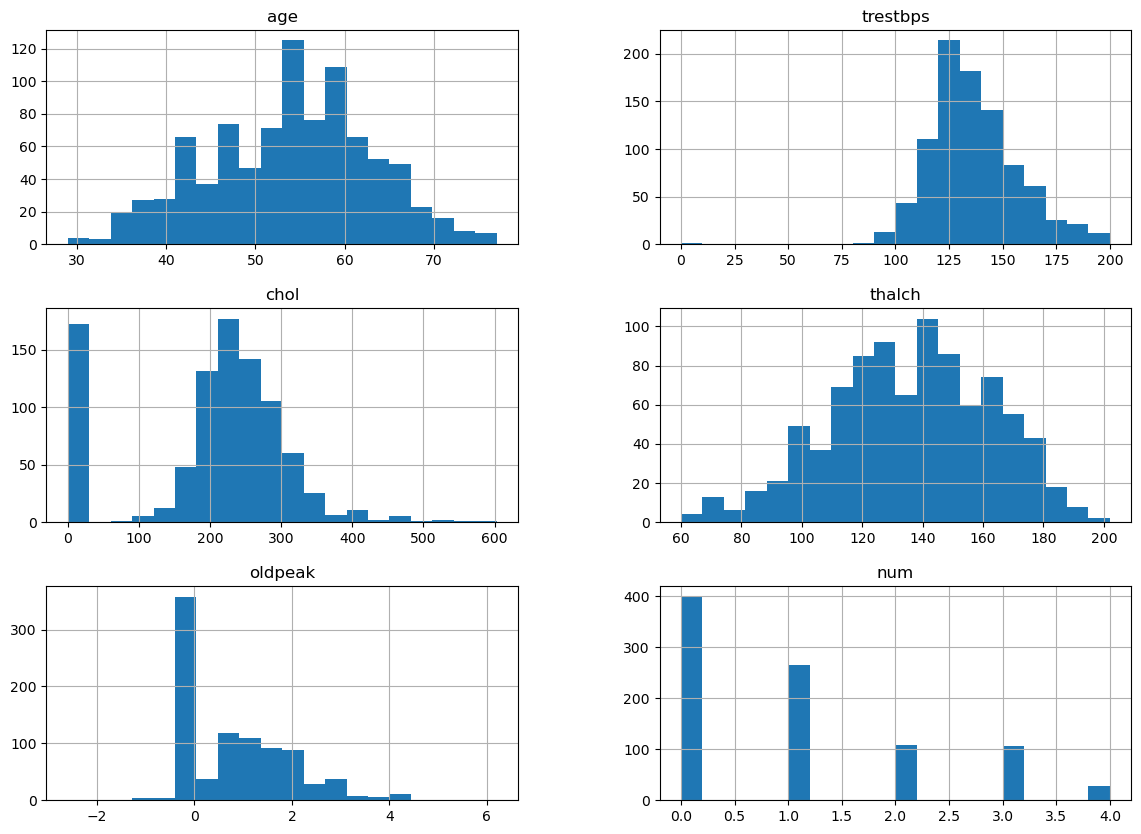

In [22]:
df.hist(bins=20, figsize=(14, 10))
plt.show()

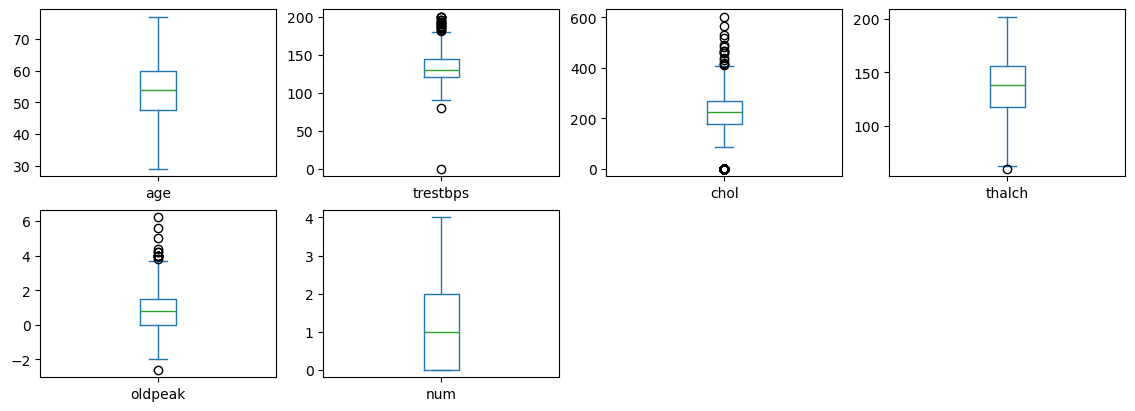

In [23]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 10), sharex=False, sharey=False)
plt.show()


## 3. Feature Engineering:

### Encode categorical variable

In [31]:
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal','fbs']
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,1,2.500000,0,2,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,2,4


In [36]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.333854,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.845392,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.466392,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.845392,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.575856,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.575856,2,2,4
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.997103,1,2,4
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.523354,0,2,4
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,2,-0.000931,0,2,4


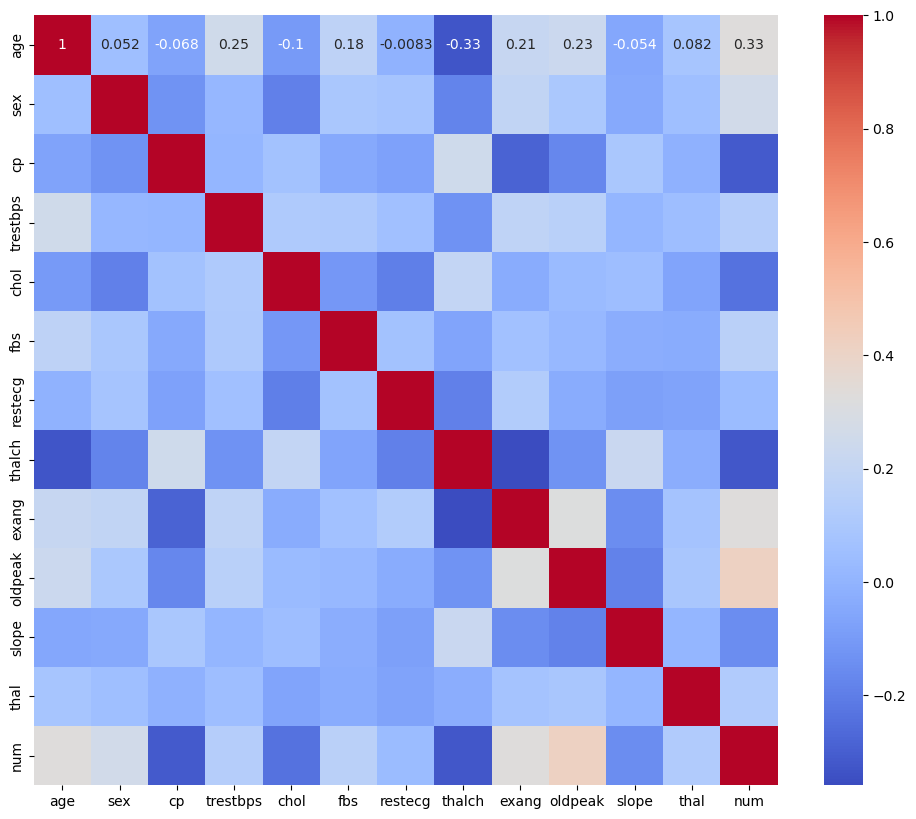

In [34]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## 4. Decision Tree Classification:

#### Split the dataset into X and y

In [38]:
X = df.drop('num', axis=1) 
y = df['num']

#### split the data in train nad test 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### model building

In [40]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 3, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1,
       1, 1, 4, 1, 0, 3, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 3, 0,
       2, 0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 0, 4, 0, 3, 3, 1, 0, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 0,
       0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 3, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 3, 0, 2, 0, 3, 0, 1, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 4, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 1, 4, 3, 0], dtype=int64)

In [50]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[66, 15,  4,  3,  1],
       [13, 24,  3,  5,  2],
       [ 3, 10,  4,  1,  2],
       [ 3,  8,  2,  4,  0],
       [ 1,  4,  3,  0,  1]], dtype=int64)

#### Evaluate the model

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))


Accuracy: 0.5439560439560439
Precision: 0.5413455939057863
Recall: 0.5439560439560439
F1 Score: 0.5395499738356881
ROC-AUC Score: 0.599827070042297


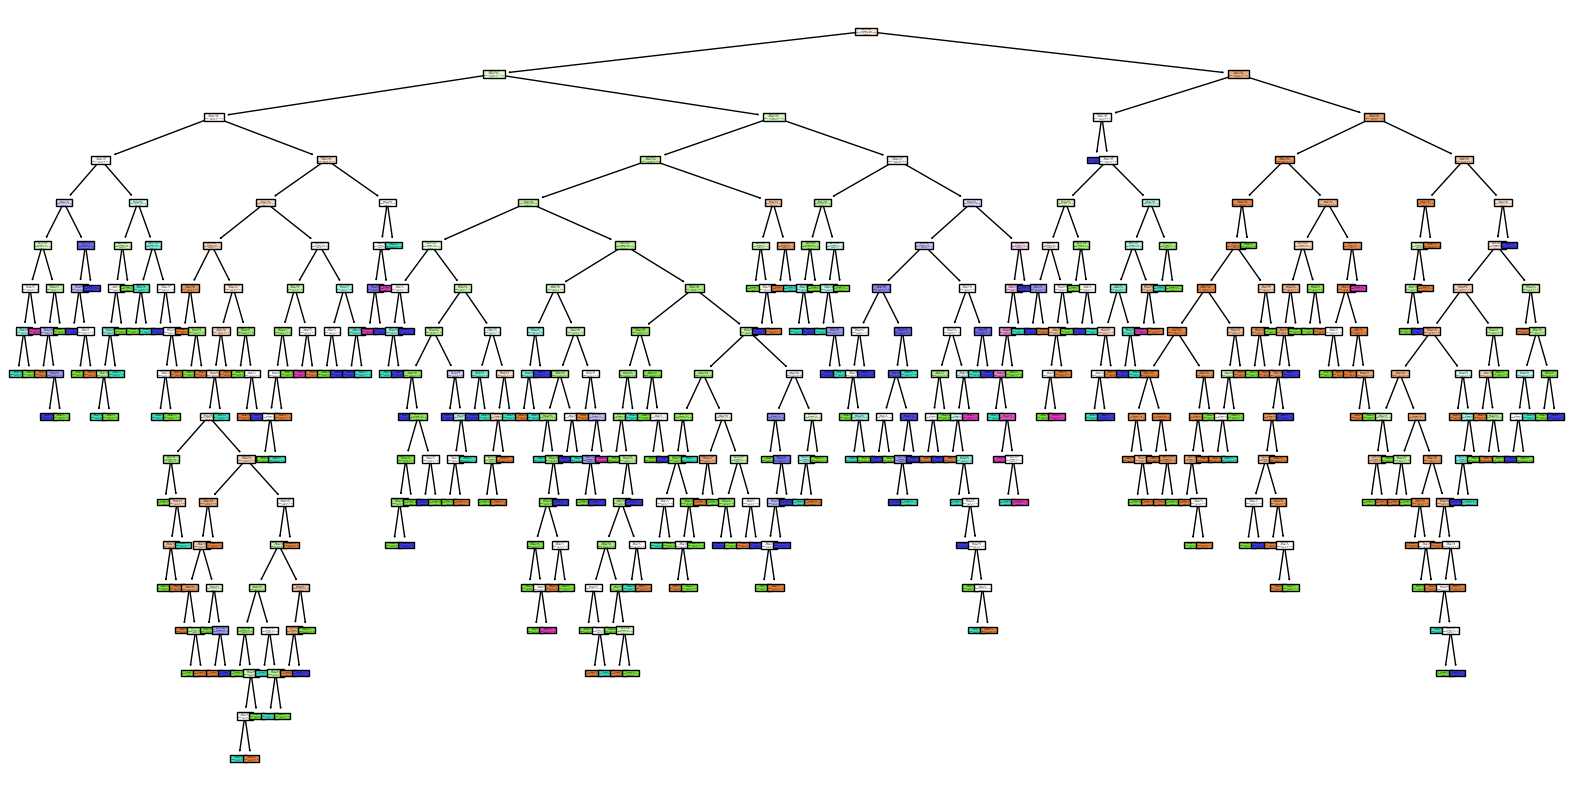

In [66]:
class_names = ['0', '1', '2', '3', '4']  # Adjust based on actual unique values in 'num'

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

### observation :
The model's initial performance metrics were:
decision tree classifier gives accuracy_score is 0.5439560439560439 .for improve accuracy for model we apply hyper patameter tunning 

## 5. Hyperparameter Tuning:

In [54]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [55]:
# Get the best parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [57]:
# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [59]:
# Make predictions with the best model
best_y_pred = best_model.predict(X_test)
best_y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0,
       1, 1, 3, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0], dtype=int64)

#### Evaluate the best model

In [60]:
print("Best Model Accuracy:", accuracy_score(y_test, best_y_pred))
print("Best Model Precision:", precision_score(y_test, best_y_pred, average='weighted'))
print("Best Model Recall:", recall_score(y_test, best_y_pred, average='weighted'))
print("Best Model F1 Score:", f1_score(y_test, best_y_pred, average='weighted'))
print("Best Model ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovo'))

Best Model Accuracy: 0.5879120879120879
Best Model Precision: 0.4837734985140645
Best Model Recall: 0.5879120879120879
Best Model F1 Score: 0.5293610922258136
Best Model ROC-AUC Score: 0.6663478341372409


In [61]:
# Confusion Matrix for best model
confusion_matrix(y_test, best_y_pred)

array([[77, 11,  0,  1,  0],
       [14, 28,  0,  5,  0],
       [ 4, 13,  0,  3,  0],
       [ 6,  9,  0,  2,  0],
       [ 5,  3,  0,  1,  0]], dtype=int64)

### observation :
after appling hyperparameter tuning we get the best model on max_depth=3 and best model accuracy is0.5879120879120879 which is greater then the model acuracy

## 6. Model Evaluation and Analysis:

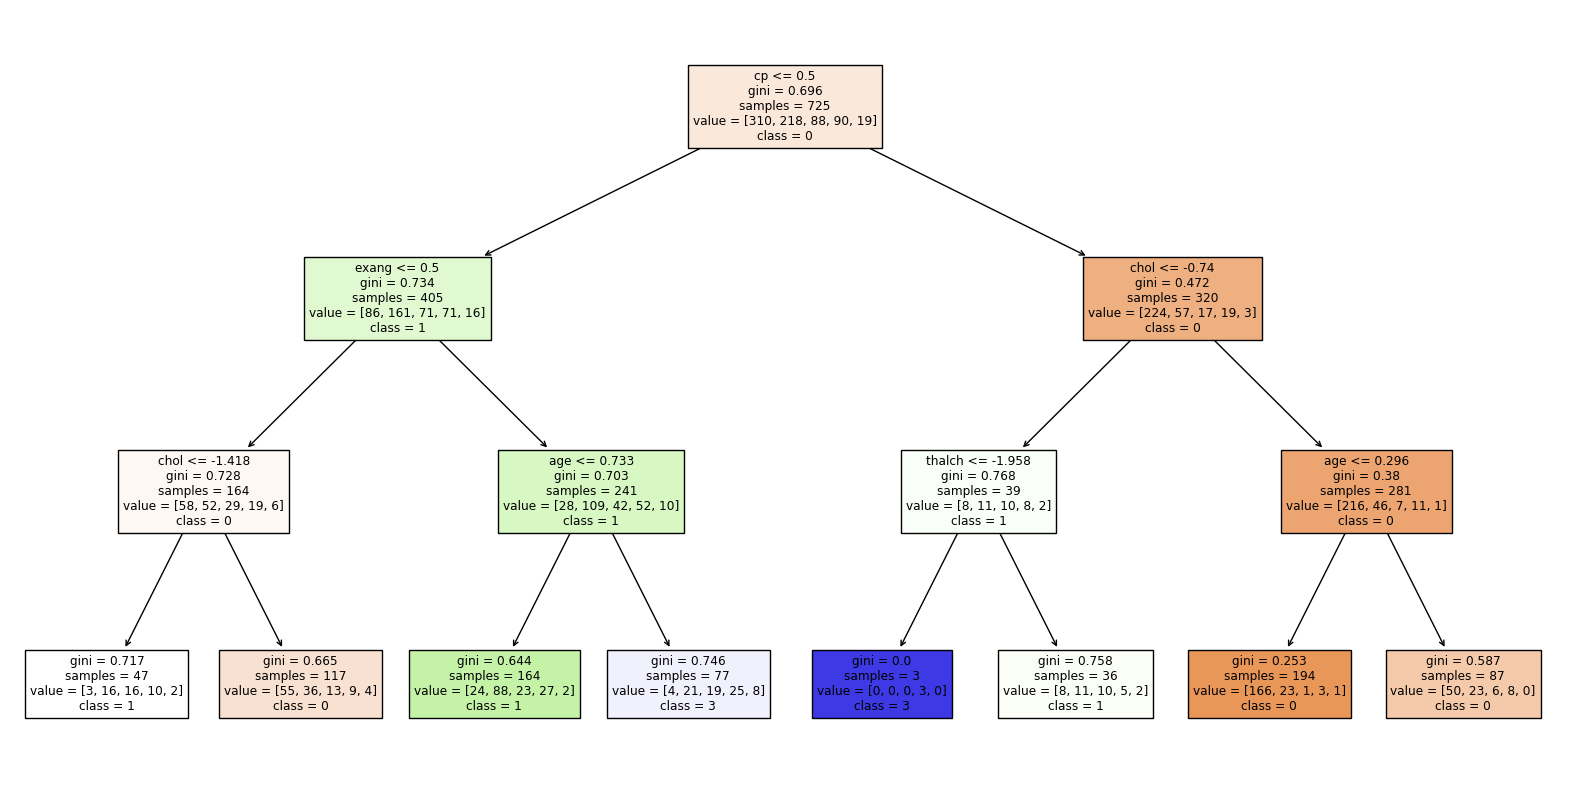

In [63]:
class_names = ['0', '1', '2', '3', '4']  # Adjust based on actual unique values in 'num'

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [65]:
# Feature importance
feature_importance = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df 

,Feature,Importance
2,cp,0.549423
4,chol,0.216141
0,age,0.127807
8,exang,0.080586
7,thalch,0.026043
1,sex,0.000000
3,trestbps,0.000000
5,fbs,0.000000
6,restecg,0.000000
9,oldpeak,0.000000


### conclusion:
In this assignment, we applied Decision Tree Classification to a heart disease dataset, performing data preparation, exploratory data analysis, feature engineering, model training,in model The dataset was split into training (80%) and testing (20%) sets.The model's initial performance metrics is  Moderat to improve model accuracy We performed hyperparameter tuning using GridSearchCV to find the best model parameters.
Best Model Accuracy: 0.5879120879120879 g, and model evaluation.  